# *k* Nearest Neighbour

### Use `NearestNeighbors` to identify neighbours.  
Athlete Selection Data  
First load dataset into a data frame.

In [144]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
athlete = pd.read_csv('AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [145]:
names = athlete.index
names

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
      dtype='object', name='Athlete')

In [146]:
# Store features and labels in numpy arrays X and y
y = athlete.pop('Selected').values
X = athlete.values
q = [5.0,7.5]
X[0]

array([2.5, 6. ])

In [147]:
athlete

,Speed,Agility
Athlete,,
x1,2.50,6.00
x2,3.75,8.00
x3,2.25,5.50
x4,3.25,8.25
x5,2.75,7.50
x6,4.50,5.00
x7,3.50,5.25
x8,3.00,3.25
x9,4.00,4.00


In [148]:
X

array([[2.5 , 6.  ],
       [3.75, 8.  ],
       [2.25, 5.5 ],
       [3.25, 8.25],
       [2.75, 7.5 ],
       [4.5 , 5.  ],
       [3.5 , 5.25],
       [3.  , 3.25],
       [4.  , 4.  ],
       [4.25, 3.75],
       [2.  , 2.  ],
       [5.  , 2.5 ],
       [8.25, 8.5 ],
       [5.75, 8.75],
       [4.75, 6.25],
       [5.5 , 6.75],
       [5.25, 9.5 ],
       [7.  , 4.25],
       [7.5 , 8.  ],
       [7.25, 3.75]])

In [149]:
y

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
      dtype=object)

### Plot this dataset

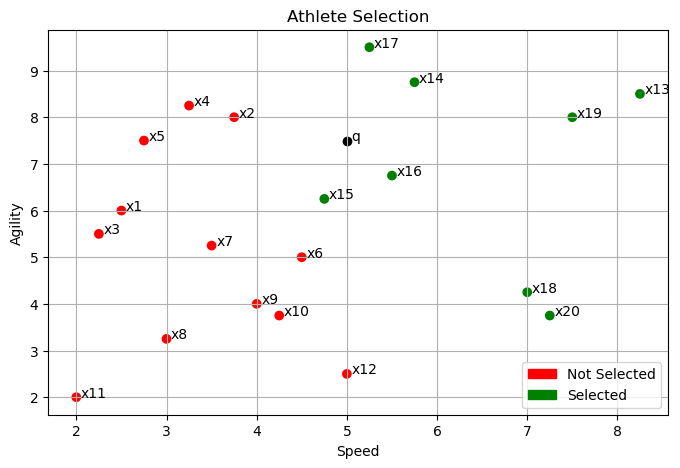

In [150]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X[:,0]
x2 = X[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q[0],q[1],color='black')
plt.annotate('q',(q[0]+0.05,q[1]))
plt.title("Athlete Selection")
plt.xlabel("Speed")
plt.ylabel("Agility")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

## Data Normalization
Features may be measured on very different scales.  
(Not really an issue here.)  
Rescale the data so that all features have the same scale, two options:
- N(0,1) rescale with zero mean and unit variance
- MinMax scaling - typically in the range (0,1)

### N(0,1)

In [151]:
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
X_scaled

array([[0.08      , 0.53333333],
       [0.28      , 0.8       ],
       [0.04      , 0.46666667],
       [0.2       , 0.83333333],
       [0.12      , 0.73333333],
       [0.4       , 0.4       ],
       [0.24      , 0.43333333],
       [0.16      , 0.16666667],
       [0.32      , 0.26666667],
       [0.36      , 0.23333333],
       [0.        , 0.        ],
       [0.48      , 0.06666667],
       [1.        , 0.86666667],
       [0.6       , 0.9       ],
       [0.44      , 0.56666667],
       [0.56      , 0.63333333],
       [0.52      , 1.        ],
       [0.8       , 0.3       ],
       [0.88      , 0.8       ],
       [0.84      , 0.23333333]])

In [152]:
q_scaled

array([[0.48      , 0.73333333]])

In [153]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
X_scaled

array([[-1.17233398,  0.07406115],
       [-0.47451614,  0.98558301],
       [-1.31189755, -0.15381931],
       [-0.75364327,  1.09952324],
       [-1.03277041,  0.75770254],
       [-0.05582543, -0.38169978],
       [-0.6140797 , -0.26775954],
       [-0.89320684, -1.1792814 ],
       [-0.33495257, -0.8374607 ],
       [-0.195389  , -0.95140094],
       [-1.45146112, -1.74898256],
       [ 0.22330171, -1.52110209],
       [ 2.03762811,  1.21346347],
       [ 0.64199242,  1.3274037 ],
       [ 0.08373814,  0.18800138],
       [ 0.50242885,  0.41588185],
       [ 0.36286528,  1.6692244 ],
       [ 1.33981027, -0.72352047],
       [ 1.6189374 ,  0.98558301],
       [ 1.47937383, -0.95140094]])

In [154]:
q_scaled

array([[0.22330171, 0.75770254]])

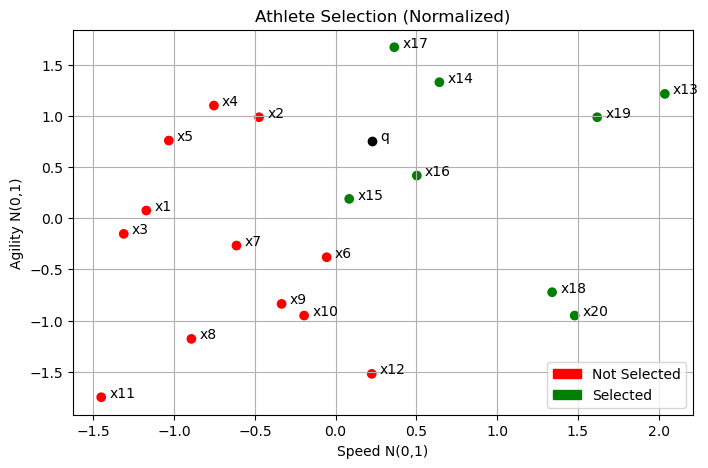

In [155]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X_scaled[:,0]
x2 = X_scaled[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q_scaled[0,0],q_scaled[0,1],color='black')
plt.annotate('q',(q_scaled[0,0]+0.05,q_scaled[0,1]))
plt.title("Athlete Selection (Normalized)")
plt.xlabel("Speed N(0,1)")
plt.ylabel("Agility N(0,1)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

In [156]:
athlete_neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
athlete_neigh.fit(X_scaled)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [157]:
athlete_neigh

NearestNeighbors(n_neighbors=2, radius=0.4)

In [158]:
# Find x nearest neighbours for X4
x4 = X_scaled[3]
athlete_neigh.kneighbors([x4], 2, return_distance=True)

(array([[0.        , 0.30148688]]), array([[3, 1]]))

In [159]:
# Find nearest neighbours for X4 within a radius 
athlete_neigh.radius_neighbors([x4], 1.0, return_distance=True)

(array([array([0.30148688, 0.        , 0.44130868])], dtype=object),
 array([array([1, 3, 4])], dtype=object))

In [160]:
# Find three nearest neighbours for q
q = [5.0,7.5]
q3n = athlete_neigh.kneighbors([q], 3)[1][0]
# q3n contains the 'index' of the nearest neighbours
for n in q3n:
    print(names[n])

x13
x19
x17


## *k*-NN Classifier



In [161]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN = kNN.fit(X_scaled,y)
kNN.predict(q_scaled)

array(['Yes'], dtype=object)

In [162]:
q_scaled

array([[0.22330171, 0.75770254]])

### Forecast data

In [163]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn import preprocessing

train = pd.read_csv('Forecast.csv')
train

,Temperature,Humidity,Wind_Speed,Go-Out
0,6,85,30,0
1,14,90,35,0
2,15,86,8,1
3,21,56,15,1
4,17,67,9,1
5,9,70,16,0
6,13,34,11,1
7,17,95,32,0
8,14,70,11,1
9,17,80,28,1


In [164]:
train.shape

(18, 4)

In [165]:
y = train.pop('Go-Out').values # y is a numpy array with the class labels

In [166]:
X = train.values.astype(float)  # X is a numpy array with the training data converted to floats

In [167]:
X = train.values

In [168]:
X

array([[ 6, 85, 30],
       [14, 90, 35],
       [15, 86,  8],
       [21, 56, 15],
       [17, 67,  9],
       [ 9, 70, 16],
       [13, 34, 11],
       [17, 95, 32],
       [14, 70, 11],
       [17, 80, 28],
       [15, 70,  6],
       [16, 90,  7],
       [22, 75, 19],
       [16, 91, 28],
       [14, 42,  8],
       [ 7, 95, 21],
       [12, 15, 28],
       [14, 70, 21]])

In [169]:
X.shape

(18, 3)

In [170]:
# Default k-NN metric is Minkowski with p = 2, i.e. Euclidean
forecast_kNN = KNeighborsClassifier(n_neighbors=3) 
forecast_kNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [171]:
forecast_kNN

KNeighborsClassifier(n_neighbors=3)

In [172]:
# Generate predictions (forecasts) for 2 query examples
xinput = np.array([[8.,70.,11.],
                   [8,69,15]])
forecast_kNN.predict(xinput)

array([1, 0])

In [173]:
# Explicitly find the neighbours (and distances) for a query
q = [8,69,15]
forecast_kNN.kneighbors([q])

(array([[1.73205081, 7.28010989, 8.54400375]]), array([[ 5,  8, 17]]))

In [174]:
y_dash = forecast_kNN.predict(X) # Use training data as test
print('     y:',y)
print('y_dash:',y_dash)

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0]


In [175]:
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[ 7  1]
 [ 0 10]]


What would we expect to happen when k=1? (Try it.)

### Normalise data
The default for `preprocessing.scale` is to convert features to N(0,1)

In [176]:
# X_scaled = preprocessing.scale(X)
scaler_minMax = preprocessing.MinMaxScaler(feature_range=(0,1))
X_scaled = scaler_minMax.fit_transform(X)
forecast_kNN_S = KNeighborsClassifier(n_neighbors=3)
forecast_kNN_S.fit(X_scaled,y)
y_dash = forecast_kNN_S.predict(X_scaled)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 
print('\n     y:',y)
print('y_dash:',y_dash)

Confusion matrix:
[[7 1]
 [1 9]]

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1]


In [177]:
help(preprocessing)

Help on package sklearn.preprocessing in sklearn:

NAME
    sklearn.preprocessing

DESCRIPTION
    The :mod:`sklearn.preprocessing` module includes scaling, centering,
    normalization, binarization methods.

PACKAGE CONTENTS
    _csr_polynomial_expansion
    _data
    _discretization
    _encoders
    _function_transformer
    _label
    _polynomial
    _target_encoder
    _target_encoder_fast
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(sklearn.utils._metadata_requests._MetadataRequester)
        sklearn.preprocessing._data.Binarizer(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.KernelCenterer(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MaxAbsScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MinMaxScaler(

In this case scaling is actually making things worse.

In [178]:
X_scaled[:5] # First five rows of the scaled data.

array([[0.        , 0.875     , 0.82758621],
       [0.5       , 0.9375    , 1.        ],
       [0.5625    , 0.8875    , 0.06896552],
       [0.9375    , 0.5125    , 0.31034483],
       [0.6875    , 0.65      , 0.10344828]])

In [179]:
forecast_kNN_S.kneighbors([q])
# What is wrong with this? 
# We haven't scaled the query.

(array([[69.83108126, 69.89101449, 69.91430476]]), array([[ 7,  1, 13]]))

In [180]:
# We need a 'handle' on the scaler so that we can reapply it to the query
scaler = preprocessing.StandardScaler().fit(X) #A scaler object
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled[0]

array([-1.59094327, -0.10040182, -0.37117307])

In [181]:
forecast_kNN_S.fit(X_scaled,y)
forecast_kNN_S.kneighbors(q_scaled)

(array([[0.27459677, 1.38509156, 1.55384542]]), array([[ 5, 15,  8]]))

### MinMax Scaling - range (0,1)

In [182]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_scaled01 = min_max_scaler.fit_transform(X)
X_scaled01

array([[0.        , 0.875     , 0.82758621],
       [0.5       , 0.9375    , 1.        ],
       [0.5625    , 0.8875    , 0.06896552],
       [0.9375    , 0.5125    , 0.31034483],
       [0.6875    , 0.65      , 0.10344828],
       [0.1875    , 0.6875    , 0.34482759],
       [0.4375    , 0.2375    , 0.17241379],
       [0.6875    , 1.        , 0.89655172],
       [0.5       , 0.6875    , 0.17241379],
       [0.6875    , 0.8125    , 0.75862069],
       [0.5625    , 0.6875    , 0.        ],
       [0.625     , 0.9375    , 0.03448276],
       [1.        , 0.75      , 0.44827586],
       [0.625     , 0.95      , 0.75862069],
       [0.5       , 0.3375    , 0.06896552],
       [0.0625    , 1.        , 0.51724138],
       [0.375     , 0.        , 0.75862069],
       [0.5       , 0.6875    , 0.51724138]])

## Instance weighting
Why should all neighbours have the same impact on the classification?  
Give nearer neighbours a larger vote.

In [183]:
forecast_kNN_SW = KNeighborsClassifier(n_neighbors=3,weights='distance')
forecast_kNN_SW.fit(X_scaled,y)
y_dash = forecast_kNN_SW.predict(X_scaled)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 
print('\n     y:',y)
print('y_dash:',y_dash)

Confusion matrix:
[[ 8  0]
 [ 0 10]]

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]


No errors now as nearest neighbour (itself) gets the largest vote. 